In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

,Extent,Date
0,1179855.894,1979-01-01
1,879585.254,1979-02-01
2,791619.096,1979-03-01
3,1254912.071,1979-04-01
4,1620142.247,1979-05-01
...,...,...
533,1556568.455,2023-06-01
534,1917507.979,2023-07-01
535,2601630.327,2023-08-01
536,2534223.780,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((523, 12, 1), (523,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.2580 - root_mean_squared_error: 0.5079

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 9s 110ms/step - loss: 0.2525 - root_mean_squared_error: 0.5025 - val_loss: 0.2557 - val_root_mean_squared_error: 0.5057
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1836 - root_mean_squared_error: 0.4284

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.1841 - root_mean_squared_error: 0.4291 - val_loss: 0.2164 - val_root_mean_squared_error: 0.4651
Epoch 3/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1436 - root_mean_squared_error: 0.3790

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.1463 - root_mean_squared_error: 0.3825 - val_loss: 0.1740 - val_root_mean_squared_error: 0.4171
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1158 - root_mean_squared_error: 0.3403

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1137 - root_mean_squared_error: 0.3372 - val_loss: 0.1416 - val_root_mean_squared_error: 0.3763
Epoch 5/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0911 - root_mean_squared_error: 0.3019

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0861 - root_mean_squared_error: 0.2935 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3326
Epoch 6/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0643 - root_mean_squared_error: 0.2536

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0643 - root_mean_squared_error: 0.2535 - val_loss: 0.0874 - val_root_mean_squared_error: 0.2956
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0501 - root_mean_squared_error: 0.2239

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0499 - root_mean_squared_error: 0.2234 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2701
Epoch 8/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0400 - root_mean_squared_error: 0.2000

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0394 - root_mean_squared_error: 0.1984 - val_loss: 0.0583 - val_root_mean_squared_error: 0.2414
Epoch 9/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.1790

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0314 - root_mean_squared_error: 0.1772 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2178
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0211 - root_mean_squared_error: 0.1452

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0213 - root_mean_squared_error: 0.1460 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1950
Epoch 11/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1409

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1690
Epoch 12/50
52/53 [============================>.] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1302

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1556
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.1215

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1345
Epoch 14/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1253

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0153 - root_mean_squared_error: 0.1238 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1252
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1143

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1144
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0137 - root_mean_squared_error: 0.1168 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 18/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1198

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 19/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1190

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1100
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0166 - root_mean_squared_error: 0.1290 - val_loss: 0.0131 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0122 - root_mean_squared_error: 0.1103 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 28/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1146

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 29/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1251
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1287
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0114 - root_mean_squared_error: 0.1068 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1136 - val_loss: 0.0106 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0096 - root_mean_squared_error: 0.0979 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 38/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0987 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1015
Epoch 39/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1209

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 40/50
53/53 [==============================] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1075

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0116 - root_mean_squared_error: 0.1075 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0997
Epoch 41/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0095 - root_mean_squared_error: 0.0977 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 42/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 45/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0102 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT4\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9387140234311422 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

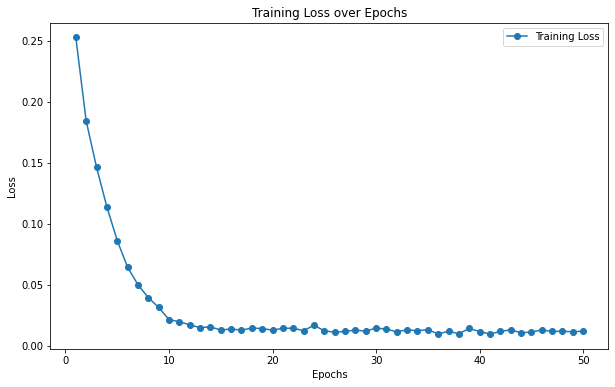

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

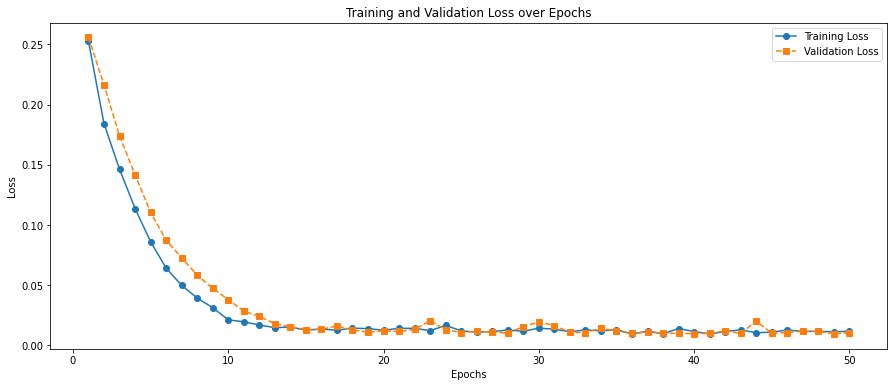

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.10273296171595246
MAE : 0.08402133266704073


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,2.231440e+06,2067343.547
1,2.340526e+06,1856673.675
2,2.163919e+06,1914289.680
3,1.776286e+06,1802244.842
4,1.246683e+06,1202791.069
5,6.306232e+05,752834.272
6,3.722213e+05,451914.219
7,3.948191e+05,439855.813
8,6.248601e+05,807857.307
9,1.017241e+06,1184280.145


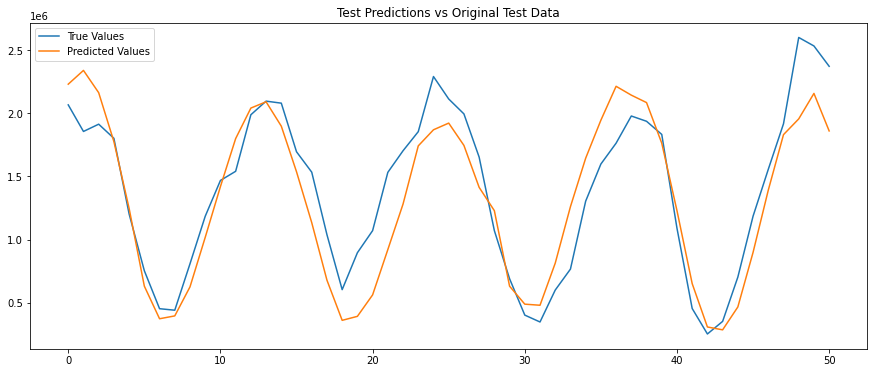

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

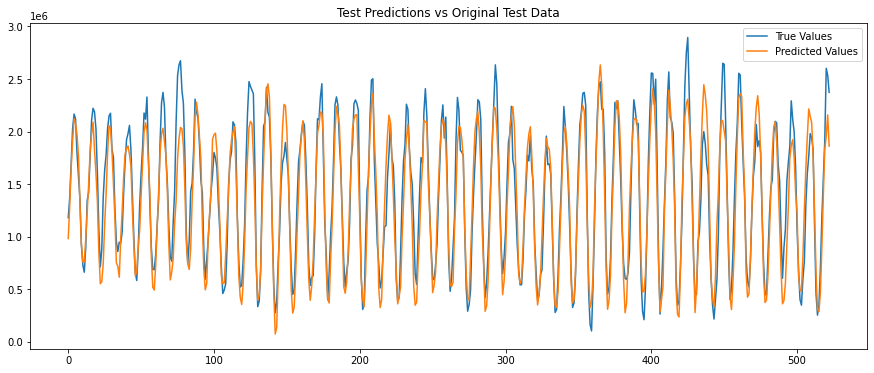

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()